# Análisis Exploratorio de Datos (EDA) para el Análisis de Personalidad del Cliente
Para este ejercicio, utilizaremos un dataset de Kaggle llamado Customer Personality Analysis.

https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

Este análisis detallado se centra en los clientes ideales de una empresa, ayudando a las empresas a comprender mejor a sus clientes y a modificar productos de acuerdo con las necesidades, comportamientos e inquietudes específicas de diferentes tipos de clientes.

El análisis de personalidad del cliente permite a una empresa ajustar sus productos en función de los clientes objetivo de diferentes segmentos. Por ejemplo, en lugar de gastar dinero en marketing para un nuevo producto dirigido a todos los clientes de la base de datos de la empresa, una empresa puede analizar qué segmento de clientes es más probable que compre el producto y luego enfocar sus esfuerzos de marketing únicamente en ese segmento en particular.

### ¿Por qué Clustering?
El clustering es una técnica utilizada para agrupar puntos de datos similares en función de sus características. En el contexto del análisis de personalidad del cliente, el clustering ayuda a identificar segmentos de clientes distintos, lo que permite a la empresa adaptar sus estrategias de marketing y ofertas de productos a grupos específicos de clientes. Al comprender estos segmentos, una empresa puede dirigir sus recursos de manera más efectiva, lo que conduce a una mayor satisfacción del cliente y a tasas de conversión más altas.

### Propósito del EDA Previo al Clustering
Antes de realizar el clustering, es crucial explorar, limpiar y preparar a fondo el dataset. Esto asegura que los clusters que generemos sean significativos y reflejen verdaderos segmentos de clientes, en lugar de estar influenciados por ruido, valores atípicos o datos inconsistentes.

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/guillelezama/eda_course/main/data/raw/marketing_campaign.csv')

In [ ]:
# Numero de Filas y Columnas
df.shape

(2240, 1)

In [ ]:
df.head()

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...


In [ ]:
# Sabemos que el dataset tiene más columnas. Cuál es el problema? Arregla el problema y lee el dataset nuevamente
df=pd.read_csv('https://raw.githubusercontent.com/guillelezama/eda_course/main/data/raw/marketing_campaign.csv', sep='\t')

In [ ]:
# Numero de Filas y Columnas
df.shape

(2240, 29)

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Datatypes e info sobre el mismo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# head y tail
print(df.head())
print(df.tail())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [ ]:
df.isnull().head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Contar los n's => Contar los nulls por variable
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


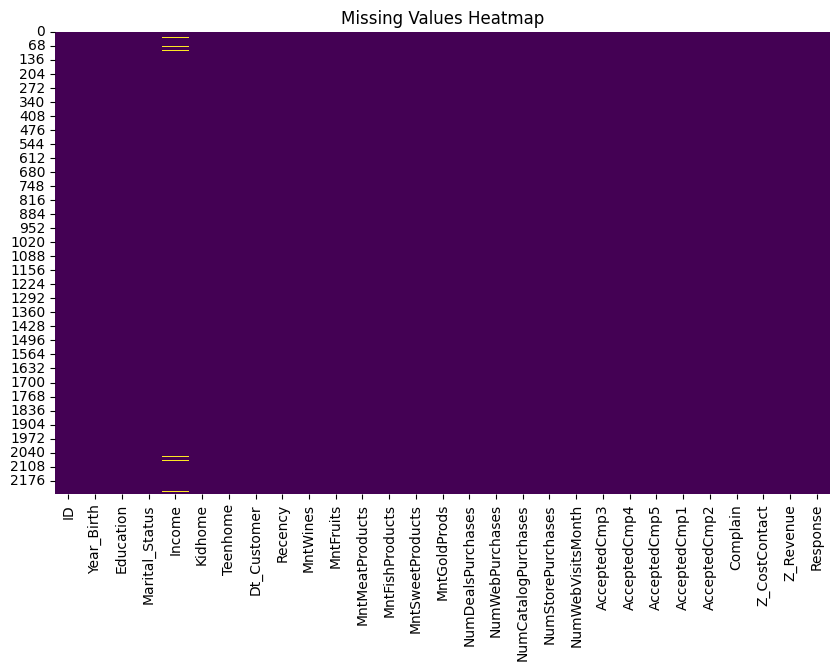

In [ ]:
# Visualicemos los missing values. Si estuvieran todos juntos, o igual de espaciados, podría haber algún problema
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Fact: Los missing en income parecen ser estar distribuidos medio random.

In [ ]:
#Reemplacemos los nulls del income con la mediana (puede ser cualquier otra variable)
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Income'].isnull().sum()

0

Fact: No todos los valores de ingreso son los reportados. Algunos son imputados. Algo potencialmente a tener en cuenta a la hora de hacer la clusterización.

In [ ]:
# Contemos si hay Id's duplicados
duplicate_ids = df[df.duplicated('ID', keep=False)]['ID'].nunique()
print(duplicate_ids)

0


In [ ]:
# Escribir codigo para borrar aquellos customers que están duplicados (aunque no los haya)
df.drop_duplicates(subset=['ID'], inplace=True)
#o
duplicated_ids = df[df.duplicated('ID', keep=False)]['ID']
df = df[~df['ID'].isin(duplicated_ids)]

Fact: No hay clientes duplicados

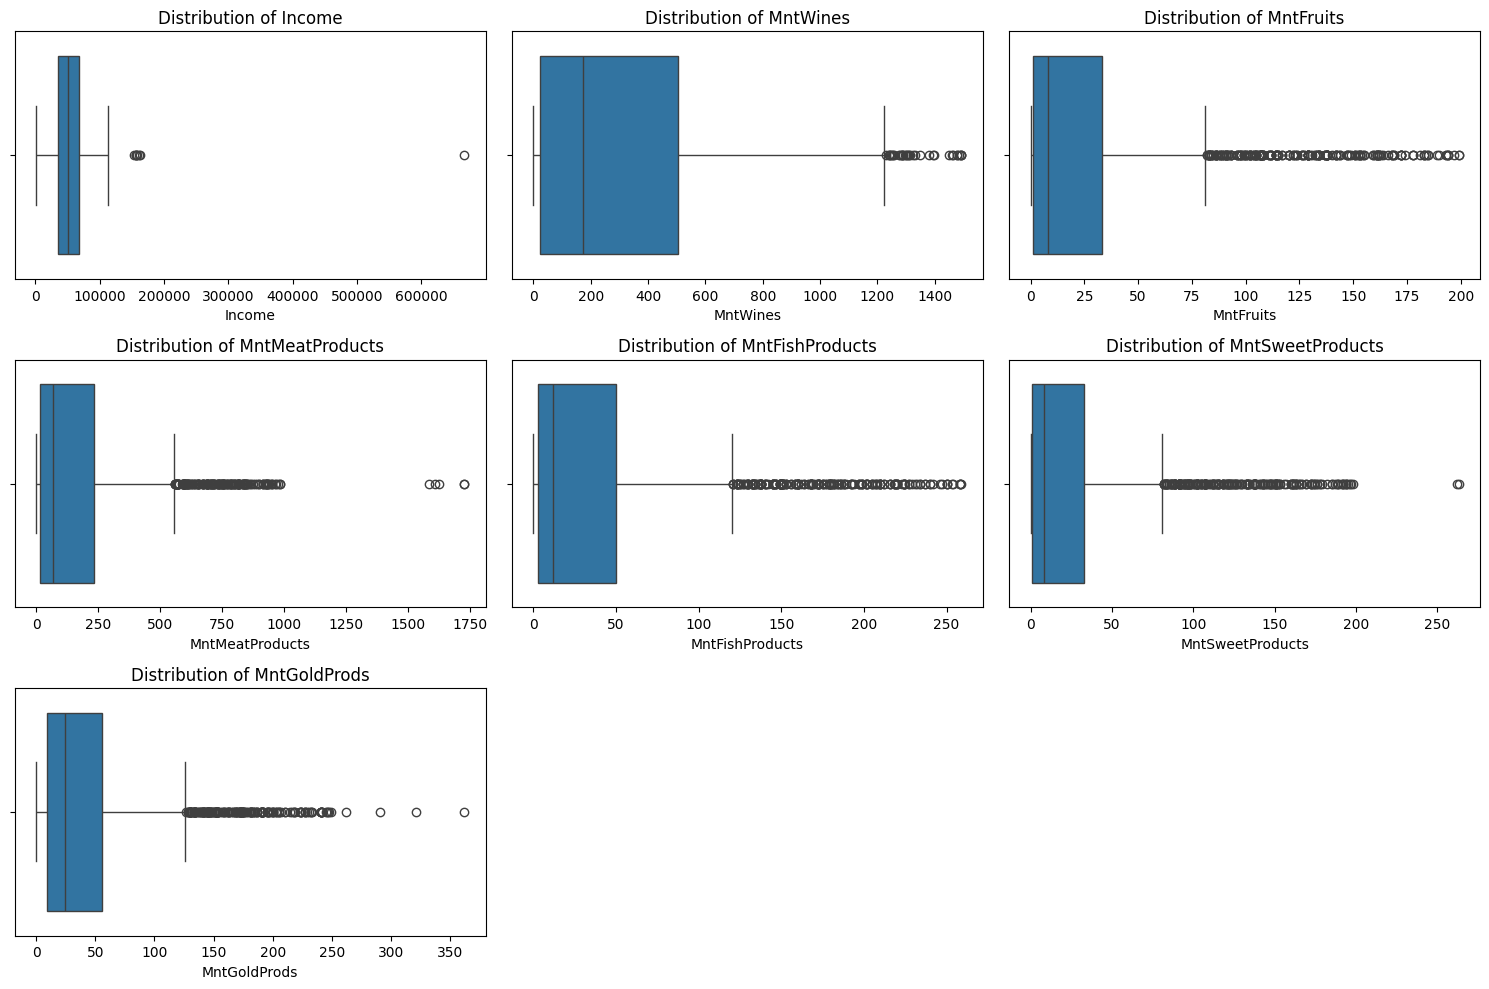

In [ ]:
# Veamos si hay outliers
plt.figure(figsize=(15, 10))

for i, col in enumerate(['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


Fact: Salvo el ingreso que parece simetricamente distribuido, el resto está más comprimido hacia cero. Tiene sentido pues son gastos

Fact: Hay varios valores muy por fuera del IQR. Eso significa que hay que eliminarlos?

In [ ]:
# Encontrar el numero de valores unicos por variables. Esto nos sirve para eliminar variables sin variacion

df.nunique()

,0
ID,2240
Year_Birth,59
Education,5
Marital_Status,8
Income,1975
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776


Fact: "Z_CostContact" y "Z_Revenue" tienen el mismo valor en todas las filas, por lo que no van a contribuir nada al analisis. Podemos eliminarlas. Además ya sabemos que no tienen null values.


In [ ]:
# Eliminar columnas sin variacion

df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


Hasta aquí son checks obligatorios. A partir de aquí, depende un poco más del proyecto en el que queremos trabajar.

<Axes: >

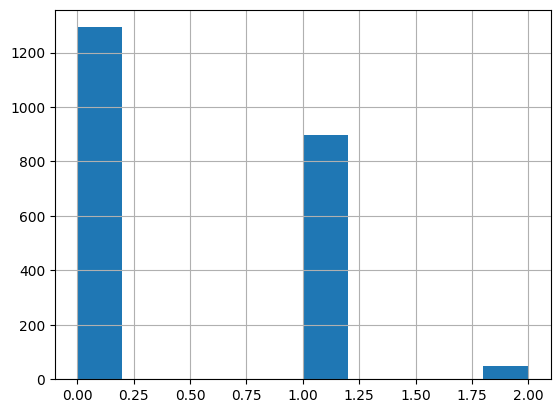

In [ ]:
# Valdrá la pena tener una sola variable de Children (Kids + Teen)?
# Pros: Reducir la dimensionalidad
# Contras: Perder informacion
# Chequear primero la distribución de cada una, y luego la de la suma
# histograma de kids
df['Kidhome'].hist()

<Axes: >

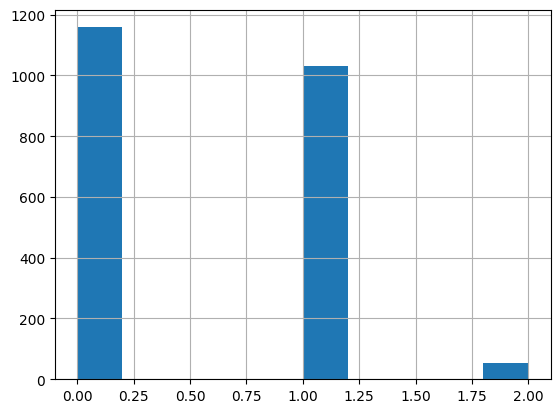

In [ ]:
# histograma de teens
df['Teenhome'].hist()


<Axes: >

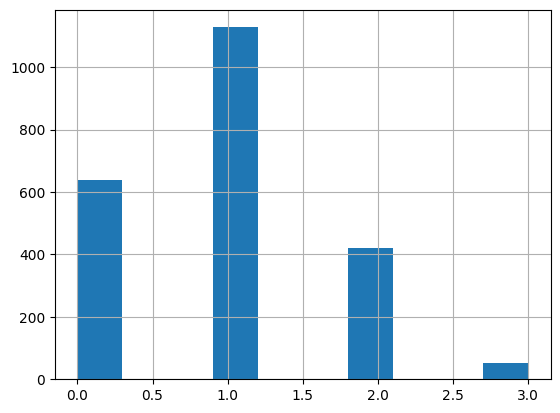

In [ ]:
#determine the number of children of the customer
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Children'].hist()

In [ ]:
# Se reduce mucho la cantidad de hogares sin menores a cargo. Y si bien ambas pueden afectar diferente, supongamos que no.
# Quedemonos solo con Children. Eliminar Kidhome y Teenhome
df.drop(['Kidhome' , 'Teenhome'] , axis = 1 , inplace = True)

Fact: Tratar a los hijos "todos juntos" muestra que la mayoría de los hogares de los clientes tienen menores en sus hogares (no visible si solo miramos niños).

In [ ]:
#Veamos los potenciales valores de 'Marital_Status'
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [ ]:
# YOLO? LoL. Uniformizemos estados maritales. No tiene sentido tener tanto ruido. Los dos nuevos valores son Partner, Single.
mapdic = {'Together': 'Partner',
          'Married': 'Partner',
          'Divorced': 'Single',
          'Widow': 'Single',
          'Alone': 'Single',
          'Absurd': 'Single',
          'YOLO': 'Single',
          'Single': 'Single'}
df['Marital_Status'] = df['Marital_Status'].map(mapdic)

In [ ]:
#Get the unique values for 'Marital_Status'
df['Marital_Status'].value_counts()

,count
Marital_Status,
Partner,1444
Single,796


In [ ]:
# Miremos a Educacion
df['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [ ]:
# Si sabemos que '2n Cycle' y 'Graduation' son personas post-grado, y basic refiere a personas que no completaron el undergraduate, podemos cambiar Education tambien.

df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')
df['Education'] = df['Education'].replace(['Basic'], 'UG')

In [ ]:
df['Education'].value_counts()

,count
Education,
PG,2186
UG,54


In [ ]:
df['NumStorePurchases'].value_counts()

NameError: name 'df' is not defined

In [ ]:
#Categorizar los datos de compras en base a categorias. Para ventas entre 0 y 3, asignemos Low, entre 4 y 7, Moderate, y mas de 8, High.
df['bins'] = pd.cut(x=df['NumStorePurchases'], bins=[-1,3,7,13],labels = ['Low', 'Moderate', 'High'])
# bins=[-1,3,7,13], -1 a 3, es lo que ponemos para incluir al 0, al 1, al 2 y 3. 3 a 7, incluye al 4, al 5, al 6 y al 7.
# [-1,3,7,13] ~ (-1,3], (3,7], (7,13]

In [ ]:
df['bins'].value_counts()

,count
bins,
Moderate,856
Low,735
High,649


In [ ]:
df['NumStorePurchases'].value_counts()

In [ ]:
# Eventualmente, para reducir la dimensionalidad, podríamos sumar los gastos, las purchases, y la cantidad de veces que se aceptó una oferta.
# Esto va a depender de que tenemos en mente. Si las ventas de Oro son muy importantes, tal vez es necesario tenerlas por separado.
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']


Text(0.5, 1.0, 'Distribution of Expenses')

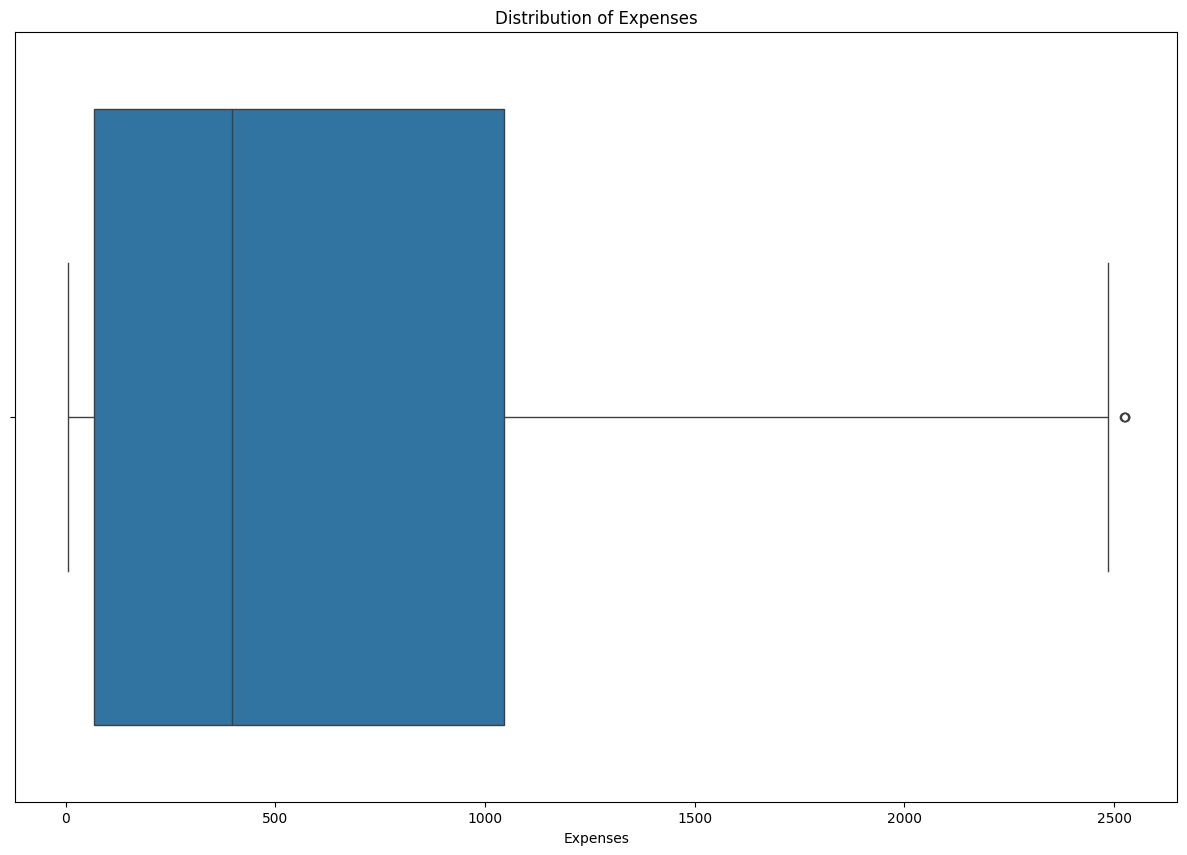

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x=df['Expenses'])
plt.title(f'Distribution of Expenses')

Ahora podemos pasar a realizar descriptivas!

In [ ]:
# Estadísticas descriptivas para terminar
print(df.describe())


                 ID   Year_Birth         Income      Recency     MntWines  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52237.975446    49.109375   303.935714   
std     3246.662198    11.984069   25037.955891    28.962453   336.597393   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000    24.000000    23.750000   
50%     5458.500000  1970.000000   51381.500000    49.000000   173.500000   
75%     8427.750000  1977.000000   68289.750000    74.000000   504.250000   
max    11191.000000  1996.000000  666666.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2240.000000      2240.000000      2240.000000       2240.000000   
mean     26.302232       166.950000        37.525446         27.062946   
std      39.773434       225.715373        54.628979         41.280498   
min       

In [ ]:
# Pero las descriptivas no finaliza seguir modificando el dataser.
# Mirando las descriptivas, y por interpretabilidad, tal vez sea necesario crear la variable de edad
df['Age'] = 2024 - df["Year_Birth"]

In [ ]:
df['Age'].describe()

,Age
count,2240.000000
mean,55.194196
std,11.984069
min,28.000000
25%,47.000000
50%,54.000000
75%,65.000000
max,131.000000


In [ ]:
df.shape

(2240, 31)

In [ ]:
df=df[df['Age']<100]

In [ ]:
df.shape

(2237, 31)